# 1 - Define the problem / Questions

# 2 - Data Collection

# 3 - Data Cleaning

- Handle missing values
- Identify and remove the duplicates
- Handle the outliers
- Transfer the data into suitable format

# 4 - EDA - Exploratory Data Analysis
# 5 - Data Visualization
# 6 - Analyze the insights & Report


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data in titanic variable

titanic = sns.load_dataset("titanic")

In [3]:
# lets start the initial data inspection

# check wheather the data is loaded or not

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# lets check the all data information

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#insights -
- we have total 891 passenger data. . where two features are in boolian , two features are in categorical data, two features are in float data, four features are in intiger, also we have five object feature.

- as we seen we have 891 passengers but the given data features contain some missing values

- so lets check the exact number

In [5]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# insights

- we have missing data like
- age have 177 missing values - should be imputed based on pclass, sex - replace by mean or median

- embarked /embarked town have 2 missing values - can be imputed with mode

- deck - massive missing values - better to drop this column

In [6]:
# impute the age missing values based on pclass and sex with median

In [7]:
titanic["age"] = titanic.groupby(['pclass', 'sex'])['age'].transform(lambda x : x.fillna(x.median()))

# categorical features always in paranthesis, and
# numerical features always in square braces
# note - Lambda is annonymous funcion that replace every iteration
# note - we use fill na- its fill the missing values with median
# note .transform is use for the line by line check with condition

In [8]:
titanic['age'].isnull().sum()

np.int64(0)

In [9]:
#replace the embarked with mode

In [10]:
titanic['embarked'].mode()[0]

'S'

In [11]:

titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

#inplace True for permenent changes

<ipython-input-11-9acdbefd8952>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [12]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [13]:
#lets drop the unwanted columns
titanic.drop(columns=['deck', 'embark_town','who', 'alive', 'adult_male'], inplace=True)

In [14]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [15]:
# it may contain the duplicated values .
# so lets check weather the values  duplicated or not

In [16]:
titanic.duplicated().sum()

np.int64(118)

In [17]:
# as we seen we have 118 duplicated records - so lets drop it permenently
titanic.drop_duplicates(inplace= True)

In [18]:
# lets check it again
titanic.duplicated().sum()

np.int64(0)

In [19]:
# so finally lets check the shape of data
titanic.shape

(773, 10)

In [20]:
# so we have finl 773 passengers data -
# lets check for the statistical features

In [21]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
count,773.000000,773.000000,773,773.000000,773.000000,773.000000,773.000000,773,773,773
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True
freq,NaN,NaN,482,NaN,NaN,NaN,NaN,562,400,436
mean,0.415265,2.247089,NaN,29.558111,0.529107,0.421734,35.003315,NaN,NaN,NaN
std,0.493087,0.853070,NaN,13.988257,0.991280,0.841380,52.443053,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,8.050000,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,16.100000,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,34.375000,NaN,NaN,NaN


# insights -
- Survival rate only  41% while 59% not survived
-  half of the passenger were in third class
- most passenger were young, adult median age is 30.but must be outliers shown 80 yer old also
- median fare is 35 $ but max was 512.33 it may contain outliers
- maximum male passenger and alone passenger
- maximum passenger embarked from "s" station
- most passenger is in thired class

In [22]:
titanic.to_csv('titanic_cleandata.csv', index=False)

EDA

In [23]:
#1 overall distribution of passenger across different classes?


In [24]:
titanic['pclass'].unique()

array([3, 1, 2])

In [25]:
titanic['pclass'].value_counts()

,count
pclass,
3,400
1,209
2,164


In [29]:
pclass_counts = titanic['pclass'].value_counts().sort_index()

In [30]:
pclass_counts

,count
pclass,
1,209
2,164
3,400


In [31]:
pclass_counts.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [32]:
pclass_counts.values

array([209, 164, 400])

<ipython-input-33-1ca2fcb14f8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_counts.index,


Text(0.5, 1.0, 'Distribution of passenger across pclass')

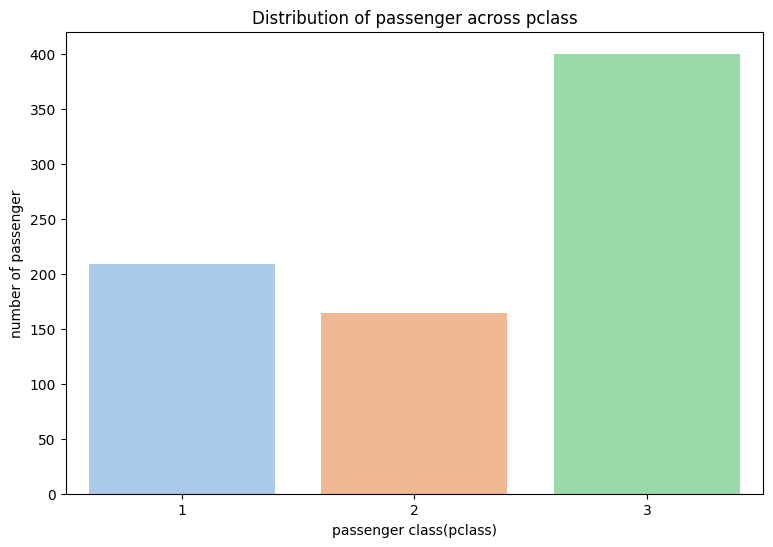

In [33]:
plt.figure(figsize=(9,6))
sns.barplot(x=pclass_counts.index,
            y=pclass_counts.values,
            palette='pastel')
plt.xlabel("passenger class(pclass)")
plt.ylabel("number of passenger")
plt.title("Distribution of passenger across pclass")

#insights -
- Majority of the passenger travel is in pclass 3 indicating it was the most affordable and populer

- pclass 1 had the medium passenger, suggesting fewer people could afford luxury travel

- pclass 2 had the least number of passenger showing middle class presence on the titanic

In [34]:
#2 How is the age of the passengers distributed?

Text(0.5, 1.0, 'distribution of the pasenger age')

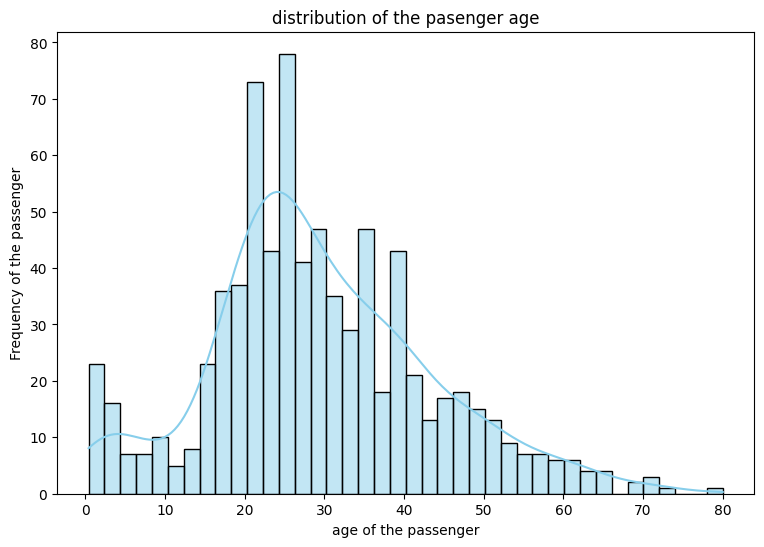

In [35]:
plt.figure(figsize=(9,6))
sns.histplot(data=titanic, x='age', bins=40,
             kde = True, color = 'skyblue')
plt.xlabel("age of the passenger")
plt.ylabel("Frequency of the passenger")
plt.title("distribution of the pasenger age")

# insights
- the peak age group is 20-30 year - indicating many young adult passenger travelled
- there are fewer childrens (age < 10) and elderly (age > 60) on board
- the age distribution has a tail on the right side, indicating some passengers were much older(may be outlier), not to be board.

# What is the distribution of passengers based on sex?

In [37]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [39]:
titanic['sex'].value_counts()

,count
sex,
male,482
female,291


In [40]:
gender_count = titanic['sex'].value_counts()

In [42]:
gender_count

,count
sex,
male,482
female,291


<ipython-input-43-26d4f7ef2aa1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_count.index,


Text(0.5, 1.0, 'Distribution of passenger based on gender')

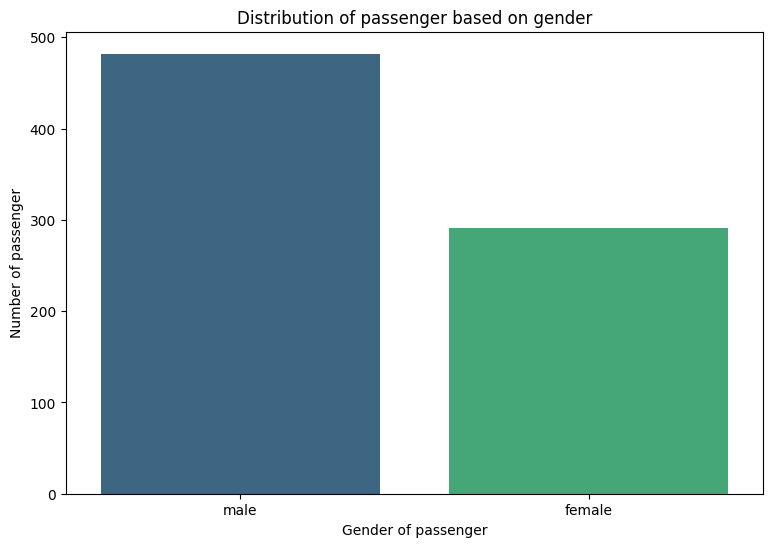

In [43]:
plt.figure(figsize = (9,6))
sns.barplot(x=gender_count.index,
            y=gender_count.values,
            palette='viridis')
plt.xlabel("Gender of passenger")
plt.ylabel("Number of passenger")
plt.title("Distribution of passenger based on gender")

# insights
- dataset shows more male passenger than females

- since the titanic was the mix immigrants workers, healthy workers, men might have travel more for work and opportunity.

# 4. how many passengers embarked from each port(embarked)?

In [44]:
titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [45]:
# S - southampton , C = cherboug , Q - Queenstown

In [46]:
titanic['embarked'].value_counts()

,count
embarked,
S,562
C,153
Q,58


In [47]:
embarked_count = titanic['embarked'].value_counts()

In [50]:
embarked_count

,count
embarked,
S,562
C,153
Q,58


<ipython-input-52-2c8035e5b271>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_count.index,


Text(0.5, 1.0, 'number of passenger from each port')

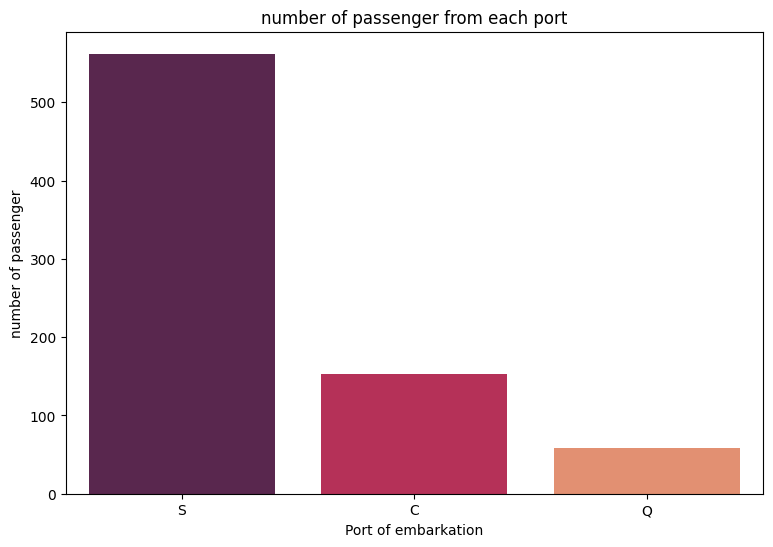

In [52]:
plt.figure(figsize=(9,6))
sns.barplot(x=embarked_count.index,
            y=embarked_count.values,
            palette= 'rocket')
plt.xlabel("Port of embarkation")
plt.ylabel("number of passenger")
plt.title("number of passenger from each port")

# insights
- may be S city have good sight scenes

In [53]:
# 5 What is the survival rate overall, and how does it vary by Pclass?


In [54]:
overall_survival_rate = titanic['survived'].mean()*100

In [55]:
overall_survival_rate

np.float64(41.52652005174644)

In [58]:
titanic.groupby('pclass')['survived'].mean()*100

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


In [59]:
survival_rate_pclass = titanic.groupby('pclass')['survived'].mean()*100

In [60]:
survival_rate_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


<ipython-input-61-3aa212142275>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate_pclass.index,


Text(0.5, 1.0, 'Survival rate by pclass %')

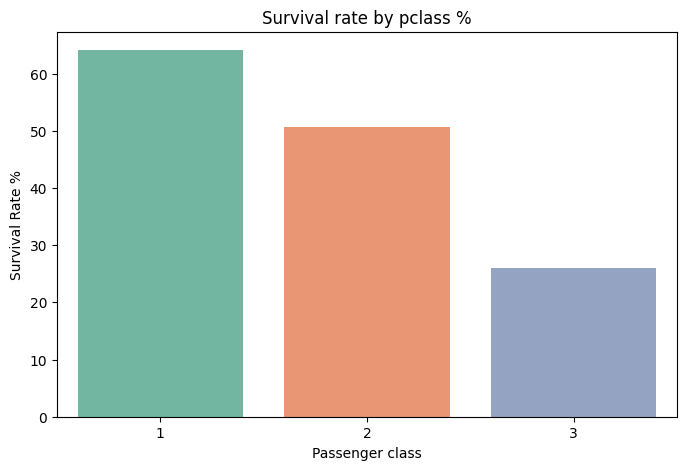

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_rate_pclass.index,
            y=survival_rate_pclass.values,
            palette='Set2')
plt.xlabel("Passenger class")
plt.ylabel("Survival Rate %")
plt.title("Survival rate by pclass %")

# insights
-pclass 1 may have higher class people or given more fare

# 6. What is the survival rate for male and female?

In [62]:
survival_rate_gender = titanic.groupby('sex')['survived'].mean()*100

In [63]:
survival_rate_gender

,survived
sex,
female,73.883162
male,21.991701


<ipython-input-65-71348a1420ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= survival_rate_gender.index,


Text(0.5, 1.0, 'Survival rate for male and female')

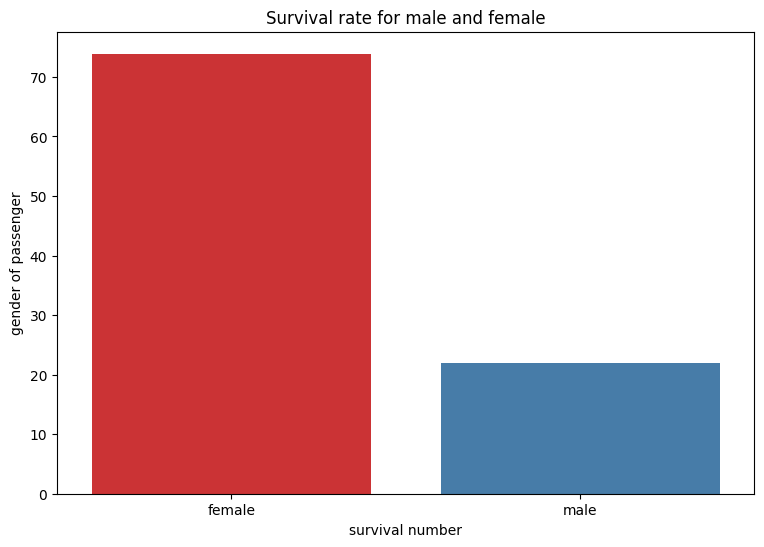

In [65]:
plt.figure(figsize=(9,6))
sns.barplot(x= survival_rate_gender.index,
            y=survival_rate_gender.values,
            palette='Set1')
plt.xlabel("survival number")
plt.ylabel("gender of passenger")
plt.title("Survival rate for male and female")

#insights

# 7. what is the survival rate for passenger from embarked point?

# 8.

# 9.

# 10

# 11. how does the fare distribution vary across different passenger classes(pclass)?

In [67]:
titanic.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,209.0,86.000578,78.905683,0.0,32.3208,61.9792,106.425,512.3292
2,164.0,21.889279,13.498846,0.0,13.0000,18.7500,26.000,73.5000
3,400.0,13.733999,10.710465,0.0,7.7750,8.0500,15.900,69.5500


In [68]:
# lets check for the outlier

<ipython-input-70-6a465928f8ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic,


Text(0.5, 1.0, 'Outlier detection')

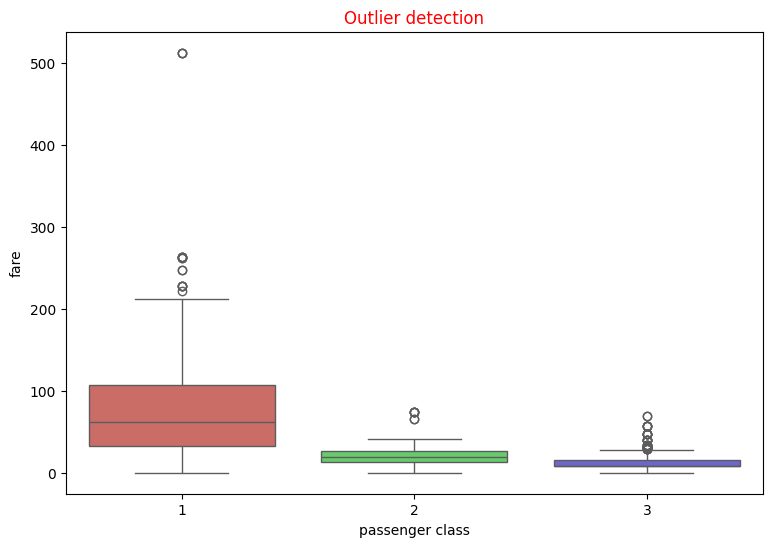

In [70]:
plt.figure(figsize = (9,6))
sns.boxplot(data = titanic,
            x = 'pclass',
            y = 'fare',
            palette = 'hls')
plt.xlabel("passenger class")
plt.ylabel("fare")
plt.title("Outlier detection" , color = 'Red')

In [71]:
# insight

In [72]:
Q1 = titanic.groupby('pclass')['fare'].quantile(0.25)

In [73]:
Q2 = titanic.groupby('pclass')['fare'].quantile(0.50)

In [74]:
Q3 = titanic.groupby('pclass')['fare'].quantile(0.75)

In [75]:
IQR = Q3 - Q1

In [76]:
Upper_bound = Q3 + 1.5 * IQR

In [77]:
Upper_bound

,fare
pclass,
1,217.5813
2,45.5000
3,28.0875
